# Capstone 3: Step 4 - Pre-processing and Training Data Development

### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   **Pre-processing and Training Data Development**

5.  Modeling
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import warnings
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from fbprophet import Prophet
# print the current working directory
print(os.getcwd())

C:\Users\Nancy\Documents\GitHub\Springboard\Capstone 3 elementary OS revenue projection


In [2]:
pd.set_option('display.max_columns',None)

## Load the data

In [17]:
# create dummy data

from pandas import util
df= util.testing.makeTimeDataFrame(nper=150)
df['Amount']=np.random.randint(low=200, high=300, size=150)
df['ds']=df.index
df.drop(['A','B','C','D'],axis=1,inplace=True)
df.head()


,Amount,ds
2000-01-03,285,2000-01-03
2000-01-04,260,2000-01-04
2000-01-05,237,2000-01-05
2000-01-06,243,2000-01-06
2000-01-07,251,2000-01-07


In [18]:
df.loc['2000-02-14','Amount'] = np.random.randint(low=1200, high=1300, size=1)
df.loc['2000-02-15','Amount'] = np.random.randint(low=1200, high=1300, size=1)
df.loc['2000-02-16','Amount'] = np.random.randint(low=1200, high=1300, size=1)
df.loc['2000-02-17','Amount'] = np.random.randint(low=1200, high=1300, size=1)
df.loc['2000-02-18','Amount'] = np.random.randint(low=1200, high=1300, size=1)

df.loc['2000-02-10':'2000-02-22']

,Amount,ds
2000-02-10,261,2000-02-10
2000-02-11,205,2000-02-11
2000-02-14,1201,2000-02-14
2000-02-15,1206,2000-02-15
2000-02-16,1222,2000-02-16
2000-02-17,1291,2000-02-17
2000-02-18,1208,2000-02-18
2000-02-21,214,2000-02-21
2000-02-22,242,2000-02-22


# Capstone 3: Step 5 - Modeling

In [19]:
# load holidays dataframe
holidays=pd.DataFrame([['2000-02-14','Forbes Article ']],columns=['ds','holiday'])
holidays['ds']=pd.to_datetime(holidays['ds'])
print(holidays)

          ds          holiday
0 2000-02-14  Forbes Article 


In [20]:
# instantiate Prophet model
model1=Prophet(holidays=holidays)

In [21]:
#model1.add_country_holidays(country_name='US')

In [22]:
# log transform the y variable to try to convert from non-stationary to stationary
df['y']=np.log(df['Amount'])

In [23]:
# Split data between train and test
split=int(len(df) * 0.8) 
# Make train and test variables, with 'train, test'
train, test = df[0:split], df[split:len(df)]

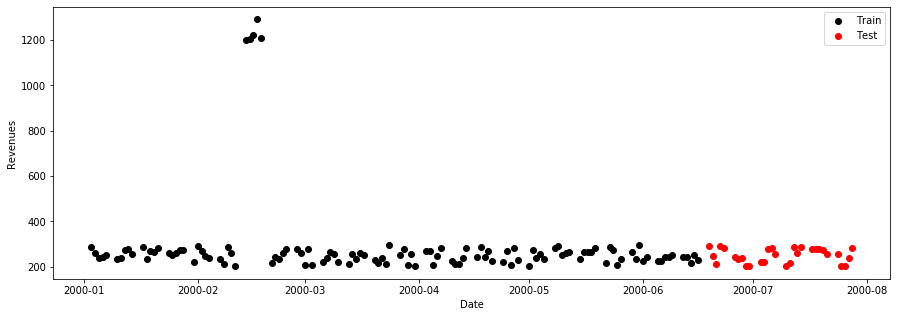

In [24]:
# plot data
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(train['ds'], train['Amount'], linestyle='None', marker='o', color='black', label='Train')
ax.plot(test['ds'], test['Amount'], linestyle='None', marker='o', color='red', label='Test')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Revenues');

### Fit the model on the training dataset

In [25]:
# fit Prophet model with training data
model1.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### run predict on all of the data (both train and test)

In [26]:
forecast = model1.predict(df)

In [27]:
pd.set_option('display.max_rows',1500)

In [28]:
forecast.describe().T

,count,mean,std,min,25%,50%,75%,max
trend,150.0,5.539844,0.087091,5.389746,5.464690,5.541097,5.617474,5.681398
yhat_lower,150.0,5.122505,0.091827,4.942667,5.051399,5.120397,5.192136,5.319937
yhat_upper,150.0,5.966956,0.090873,5.777315,5.893665,5.969806,6.037818,6.135854
trend_lower,150.0,5.539762,0.087219,5.388802,5.464690,5.541097,5.617474,5.681398
trend_upper,150.0,5.539939,0.086944,5.390846,5.464690,5.541097,5.617474,5.681398
Forbes Article,150.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Forbes Article _lower,150.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Forbes Article _upper,150.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
additive_terms,150.0,0.006912,0.019690,-0.021845,-0.007570,0.008698,0.023999,0.031278
additive_terms_lower,150.0,0.006912,0.019690,-0.021845,-0.007570,0.008698,0.023999,0.031278


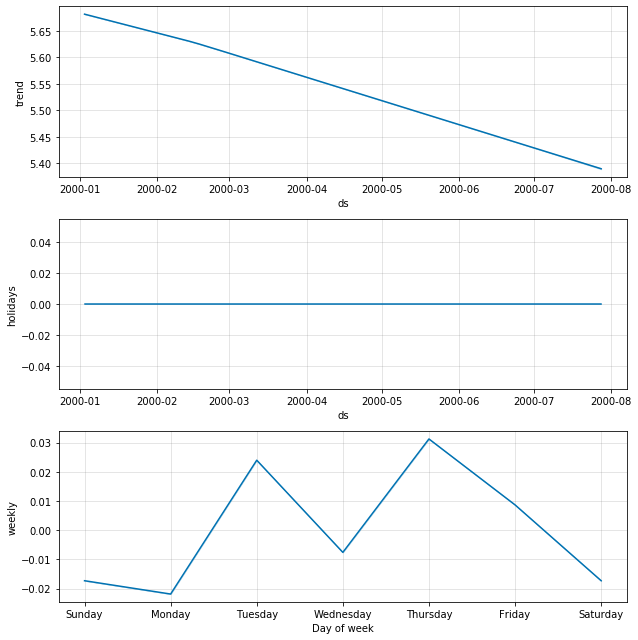

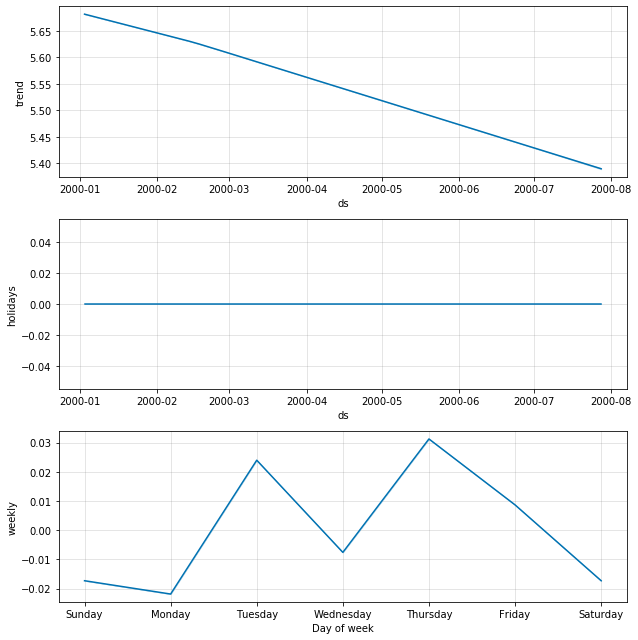

In [29]:
# plot outcomes
model1.plot_components(forecast)

### Plot forecast, train and test dataset

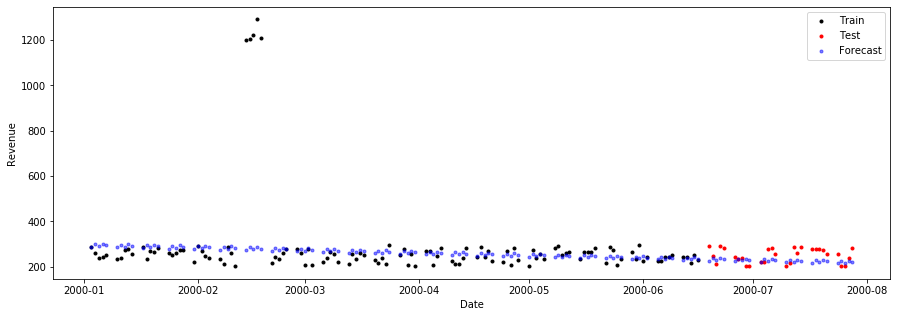

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(train['ds'], train['Amount'], c='black', marker='o', ms=3, linestyle='None', label='Train')
ax.plot(test['ds'], test['Amount'], c='r', marker='o', ms=3, linestyle='None', label='Test')
ax.plot(forecast['ds'], np.exp(forecast['yhat']), c='b', marker='o', ms=3, linestyle='None', label='Forecast', alpha=0.5)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Revenue');